In [18]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)
%matplotlib inline 
import csv
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import sys



from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.kclique import k_clique_communities



In [6]:
get_url_edges = r'C:\Users\farha\Downloads\edges_ufc.csv'
get_url_nodes = r'C:\Users\farha\Downloads\nodes_ufc.csv'

Number of nodes:  2139
Number of edges:  5864

Average degree:  5.482935951379149
Average degree (alternate calculation) 5.482935951379149

Minimum degree:  1
Maximum degree:  34
Average Clustering Coefficient:  0.06383993303854943
Number of nodes:  2139
Number of edges:  5864

Average degree:  5.482935951379149
Average degree (alternate calculation) 5.482935951379149

Minimum degree:  1
Maximum degree:  34
Average Clustering Coefficient:  0.06383993303854943


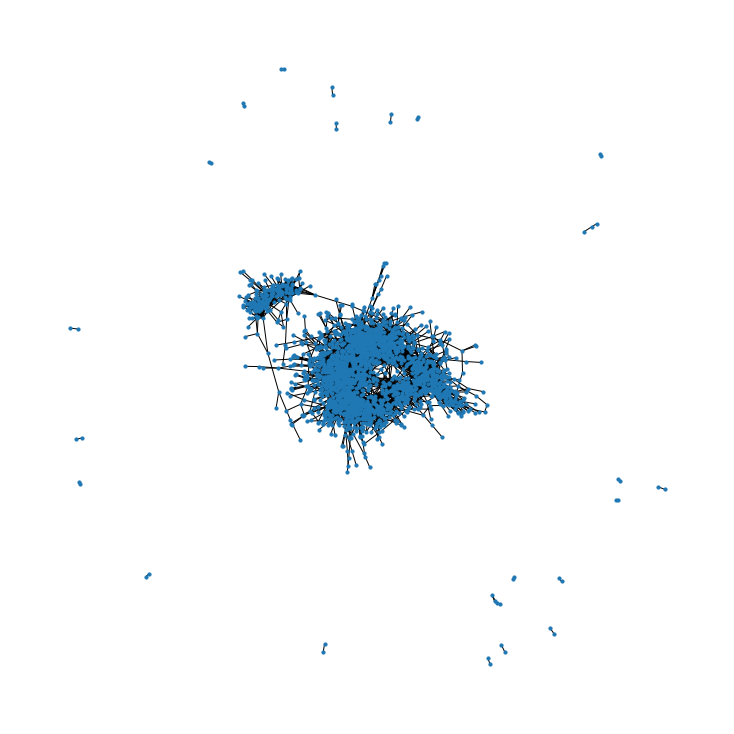

In [7]:


url = 'https://drive.google.com/file/d/1FtCv5uUaBY_GHzFrBmqpwJ5EhoVNnY4U/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)
len(data)

red_fighters = data['R_fighter'].unique().tolist()
blue_fighters = data['B_fighter'].unique().tolist() 
all_fighters = red_fighters + blue_fighters
unique_fighters = []

f = open(get_url_nodes, "w")
writer = csv.writer(f)
writer.writerow(['Fighter'])
for i in all_fighters:
    if i not in unique_fighters:
        unique_fighters.append(i)
        writer.writerow([i])
f.close()



edge_list = []
f = open(get_url_edges, "w")
writer = csv.writer(f)
writer.writerow(['Source', 'Target'])
for index, row in data.iterrows():
    edge_list.append((row['R_fighter'], row['B_fighter']))
    writer.writerow(row[['R_fighter', 'B_fighter']])
f.close()

G = nx.Graph()
G.add_nodes_from(unique_fighters)
G.add_edges_from(edge_list)
len(unique_fighters)


N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

C = np.mean(list(nx.clustering(G).values()))
# graph is apparently not connected
#d = nx.average_shortest_path_length(G,weight=None)

print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

print("Average Clustering Coefficient: ", C)
#print("Average Shortest Path: ", d)


fig = plt.figure(figsize=(10,10))
nx.draw_spring(G, node_size=10)
'''The following variable assignments are to isolate all unique fighters into one list 
(which we can later use to get our nodes)'''
red_fighters = data['R_fighter'].unique().tolist()
blue_fighters = data['B_fighter'].unique().tolist() 
all_fighters = red_fighters + blue_fighters
unique_fighters = []

f = open("nodes.csv", "w")
writer = csv.writer(f)
writer.writerow(['Fighter'])
for i in all_fighters:
    if i not in unique_fighters:
        unique_fighters.append(i)
        writer.writerow([i])
f.close()


edge_list = []
f = open("edges.csv", "w")
writer = csv.writer(f)
writer.writerow(['Source', 'Target'])
for index, row in data.iterrows():
    edge_list.append((row['R_fighter'], row['B_fighter']))
    writer.writerow(row[['R_fighter', 'B_fighter']])
f.close()


G = nx.Graph()
G.add_nodes_from(unique_fighters)
G.add_edges_from(edge_list)
len(unique_fighters)
        
    
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

C = np.mean(list(nx.clustering(G).values()))
# graph is apparently not connected
#d = nx.average_shortest_path_length(G,weight=None)

print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

print("Average Clustering Coefficient: ", C)
#print("Average Shortest Path: ", d)



In [8]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [9]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [10]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

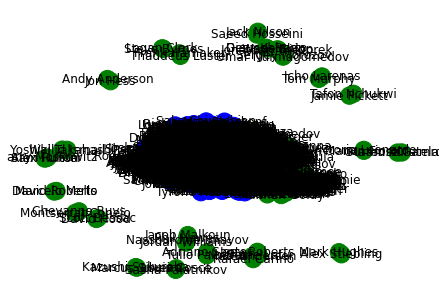

In [11]:
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

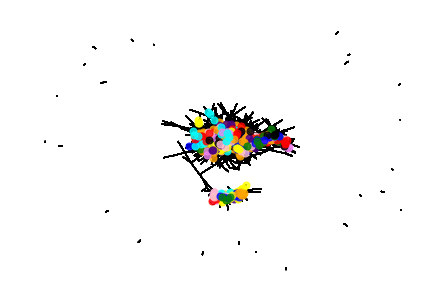

In [21]:
# CITATIONS/SOURCE https://www.kaggle.com/code/cokastefan/community-detection/notebook#Foursquare
tG = nx.read_edgelist(get_url_edges, delimiter=',')
communities = list(k_clique_communities(tG, 3))
pos = nx.spring_layout(tG)
colors = ["violet", "black", "orange", "cyan", "blue", "green", "yellow", "indigo", "pink", "red"]
for i in range(len(communities)):
    graph = communities[i]
    node_list = [node for node in graph]
    nx.draw(tG, pos, nodelist=node_list, node_color=colors[i%10], node_size=50, alpha=0.8)

In [35]:
# From SO: / CITATIONS 
# https://stackoverflow.com/questions/40941264/how-to-draw-a-small-graph-with-community-structure-in-networkx
# https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

In [23]:
dict_communities = {}

for i, c in enumerate(communities):
    for node in c:
        dict_communities[node] = i + 1
        
for node in tG:
    if node not in dict_communities.keys():
        dict_communities[node] = -1

In [24]:
pos = community_layout(tG, dict_communities)

In [25]:
from matplotlib import cm
colors = []
for node in tG.nodes:
    colors.append(cm.Set1(dict_communities[node]))

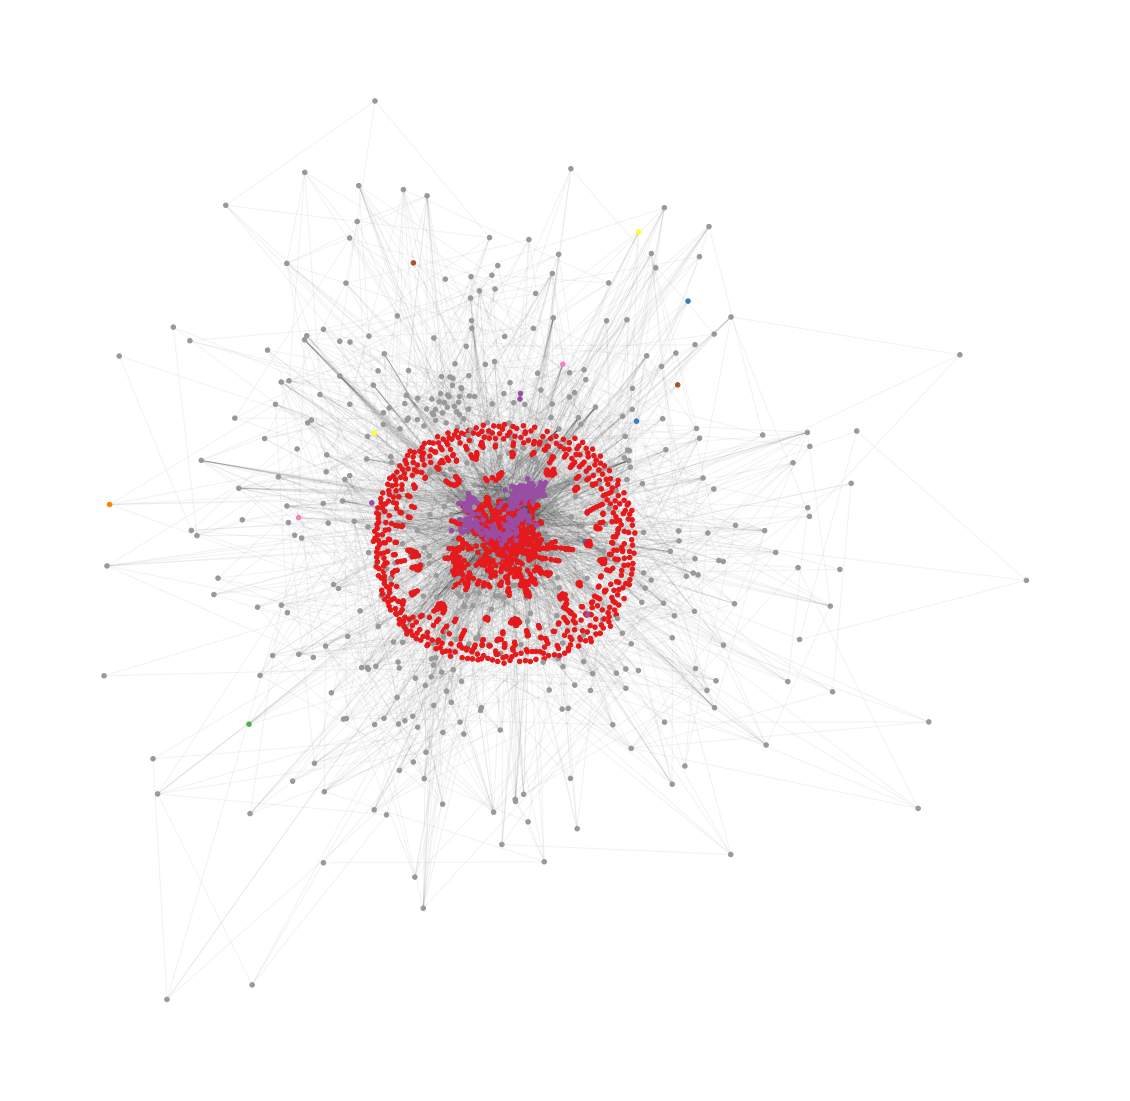

In [26]:
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(tG, pos, node_color=colors, node_size=20)
nx.draw_networkx_edges(tG, pos, alpha=0.05)
plt.axis('off')
plt.show()

In [27]:
from networkx import edge_betweenness_centrality
from random import random

def most_valuable_edge(G):
    centrality = edge_betweenness_centrality(G)
    max_cent = max(centrality.values())
    # Scale the centrality values so they are between 0 and 1,
    # and add some random noise.
    centrality = {e: c / max_cent for e, c in centrality.items()}
    # Add some random noise.
    centrality = {e: c + random() for e, c in centrality.items()}
    return max(centrality, key=centrality.get)

In [28]:
gn_generator = girvan_newman(tG, most_valuable_edge)

In [29]:
from itertools import islice
gn_communities = next(islice(gn_generator, 3, None)) # Do 3 iterations only

In [30]:
type(gn_communities)

tuple

In [31]:
gn_dict_communities = {}

for i, c in enumerate(gn_communities):
    print ("Community {}".format(i))
    for node in c:
        gn_dict_communities[node] = i + 1
        
for node in tG:
    if node not in gn_dict_communities.keys():
        gn_dict_communities[node] = -1

Community 0
Community 1
Community 2
Community 3
Community 4
Community 5
Community 6
Community 7
Community 8
Community 9
Community 10
Community 11
Community 12
Community 13
Community 14
Community 15
Community 16
Community 17
Community 18
Community 19
Community 20
Community 21
Community 22
Community 23
Community 24
Community 25
Community 26
Community 27
Community 28
Community 29


In [32]:
gn_pos = community_layout(tG, gn_dict_communities)

In [33]:
from matplotlib import cm
gn_colors = []
for node in tG.nodes:
    gn_colors.append(cm.Set1(gn_dict_communities[node]))

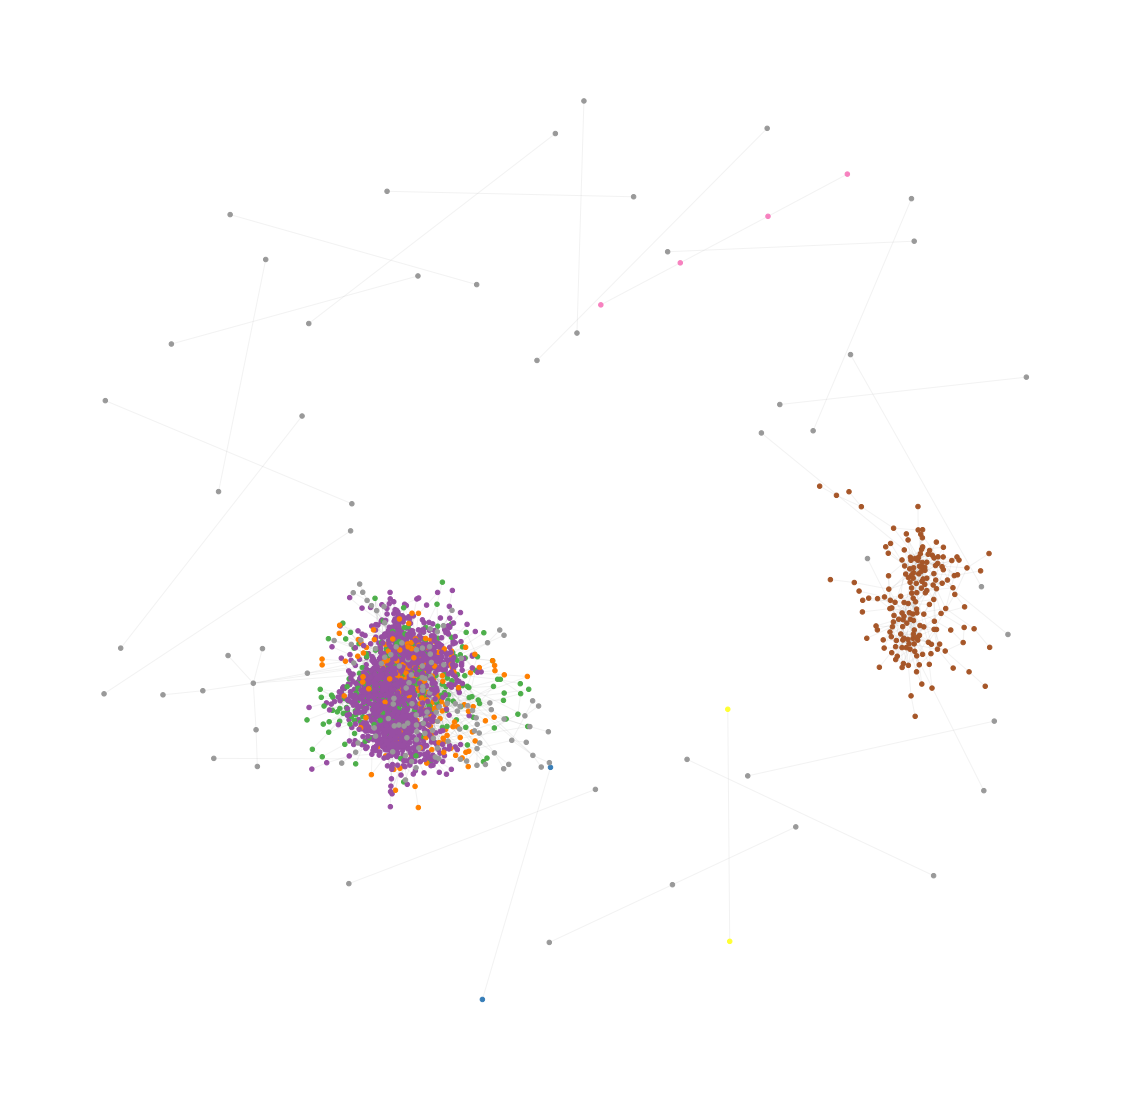

In [34]:
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(tG, gn_pos, node_color=gn_colors, node_size=20)
nx.draw_networkx_edges(tG, gn_pos, alpha=0.05)
plt.axis('off')
plt.show()